# Regularization

Regularization is a technique used to reduce overfitting, and can be helpful when your input data contains a lot of features
The graph below shows an algorithm that is beginning to overfit the data, that is, the model is learning the intricacies of the training data well, but it failing to generalise to the validation data. 


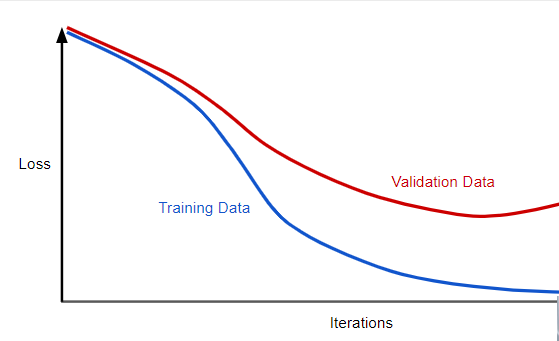

One regularization technique is simply early stopping, just stopping the algorithm when the validation loss begins to increase this can often be difficult to achieve in practice due to local minima. 

Another technique is to penalize the model complexity. How do we define model complexity?
A popular way is to simply prefer smaller weights, encoded mathematically by **ridge regularization** (aka L<sub>2</sub> regularization). 

This says that the model *complexity = sum of the square of the model weights*, akin to prefering flatter slopes for linear models. 

Mathematically, a loss function with Ridge regularization can be expressed as:

$$Loss(Data \vert Model) + \lambda (w_1^2 + \ldots + w_n^2)$$

Where $\lambda$ is a coefficient we can tweak that lets us balance how much we care about minimizing loss, vs prefering a simpler model. 

In English, this equation tries to minimise the overall loss where the model complexity (sum of the squares) is taken into account.  

The choice is $\lambda$ is up to you, if you have a lot of training data, or if your training data and test data are statistically similar, you may not want much regularization. But if you don't have much training data or if your train and test data are significantly different you probably want more. 

# Lambda

Choosing a value of lambda is crucial for getting your model just right. Take a look at the histogram below of model weights vs frequency. This is an example of where Lambda is large:

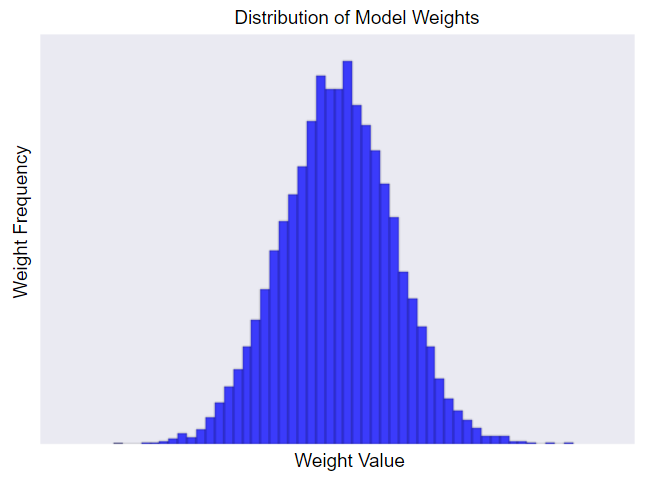


Decreasing lambda tends to yield a flatter histogram:

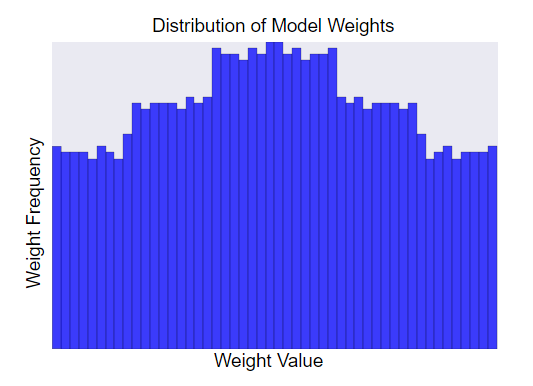


When choosing Lambda you want to balance a model that is complex enough to learn about the data, but not so complex that the model overfits the training data. 

* Lambda too small -> Risk of **overfitting** your data
* Lambda too large -> Risk of **underfitting** your data

Lambda can take any value from 0 to +infinity, and can be determined using cross validation. 

Let's take a look at the effect of Lambda with a simple SKLearn model. 

Note the KernalRidge class is used here, as the standard Ridge is only valid for linearly seperable data. 

In [48]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
import numpy as np
plt.style.use('default')

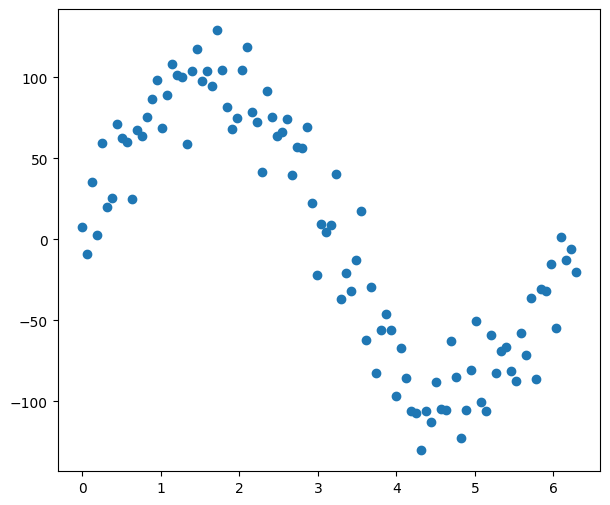

In [53]:
# Make noisy sine curve

X = np.linspace(0, 2 * np.pi, num=100)
n = np.random.normal(scale=20, size=X.size)
s = 100 * np.sin(X)
y = 100 * np.sin(X) + n

fig, ax = plt.subplots(figsize = (7,6))
ax.scatter(X,y)

c:\Users\MoroJ\OneDrive - AECOM\Documents\Python - General\ML_Fundamentals\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


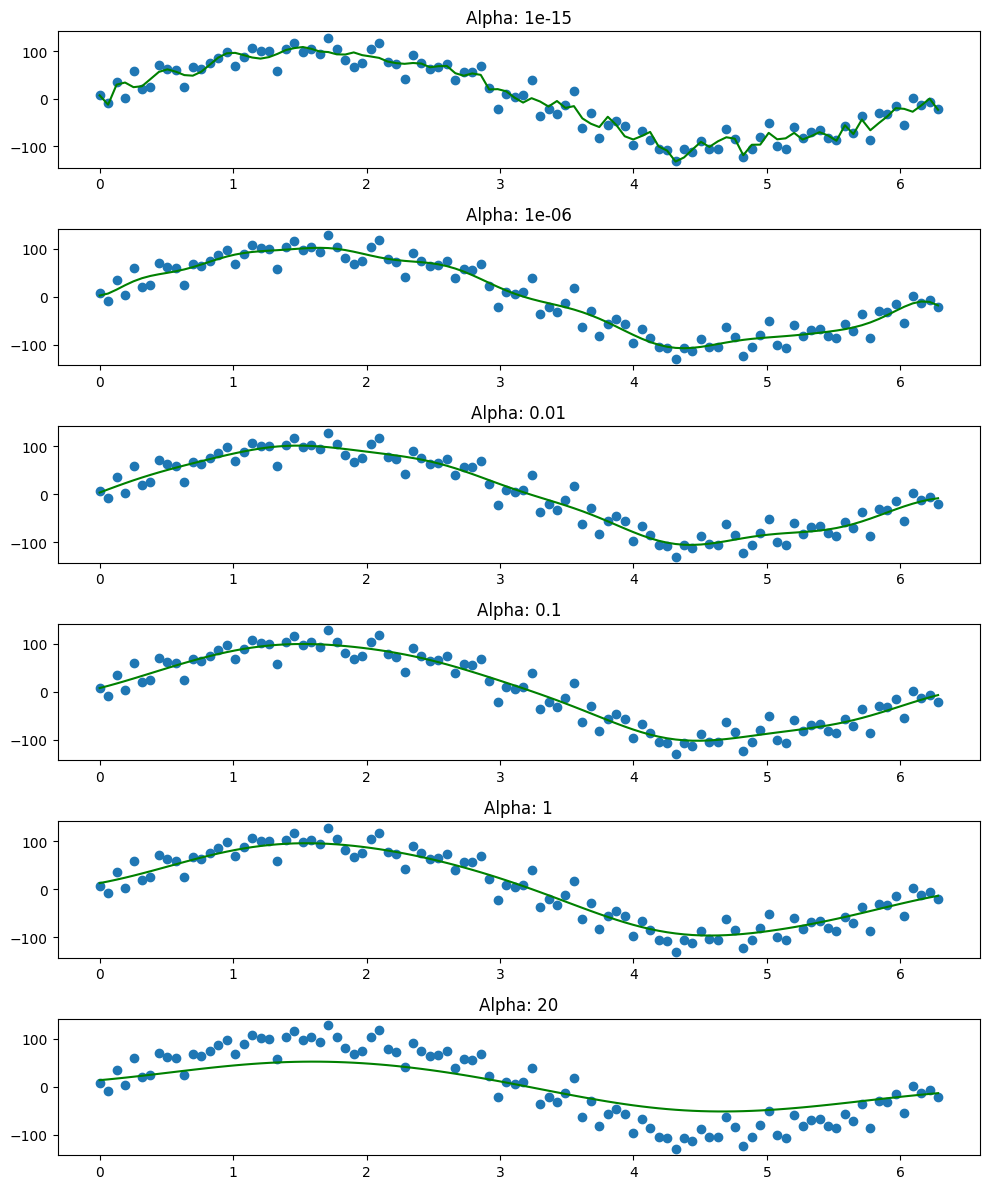

In [70]:
alphas = [1e-15, 1e-6, 0.01, 0.1, 1, 20]
fig, axes = plt.subplots(nrows = len(alphas), ncols = 1, figsize = (10,12))
axs = np.ravel(axes)
for i, alpha in enumerate(alphas):
    clf = KernelRidge(alpha = alpha, kernel="rbf")
    clf.fit(X, y)
    preds = clf.predict(X)
    axs[i].plot(X, preds, 'g')
    axs[i].scatter(X,y,)
    axs[i].set_title(f"Alpha: {alpha}")
    
plt.tight_layout()

Ridge Regularization is useful when your model contains a lot of useful features, as ridge will shrink the less useful parameters, but not remove any of them. 

Note how an increasing alpha values causes the slope of the line to approach zero, however Ridge Regularization  will never force a slope all the way to zero, unlike lasso regularization...

# Lasso Regularization 

Lasso (L<sub>1</sub>) regression is very similar to ridge regression, however instead of the sum of the squares of the coefficients, Lasso simple takes the sum of the absolute value of the coefficients


$$Loss(Data \vert Model) + \lambda (|w_1| + \ldots + |w_n|)$$

The key difference between Lasso and Ridge is that Lasso can force the slope all the way to zero. 

Lasso Regularization is helpful when your model contains a lot of useless variables, as it can force the coefficients for these variables to zero. 

# ElasticNet

If you have a model with millions of features, it's likely that some will be useful and some useless - how do you choose whether to use Lasso or Ridge Regularization? The good news is you don't have to pick, and can use Elastic Net Regression instead. 

Elastic Net Regression takes both Lasso and Ridge Regularization and combines them:

$$ ElasticNet = Least Squares + Lasso + Ridge$$
$$Loss(Data \vert Model) + \lambda_{2} (|w_1| + \ldots + |w_n|)+ \lambda_{1} (w_1^2 + \ldots + w_n^2) $$

Notice that both the lasso and ridge portions have their own lambda values. 

Let's work through an example of finding the optimum lambdas for both portions of the ElasticNet model. 

The data generated is taken from the SKLearn documentation: 

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#

In [113]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

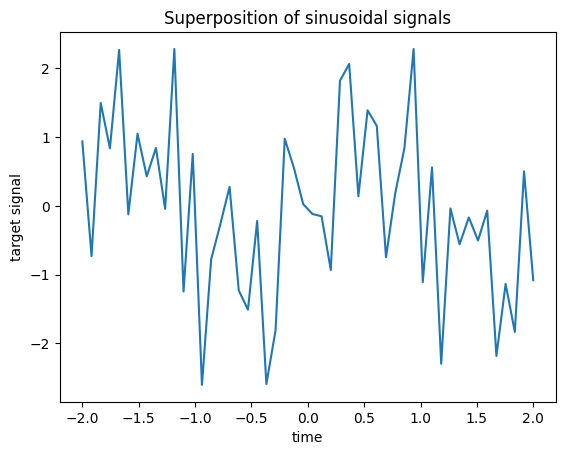

In [75]:
## Generating realistic data similar to that found from a noisy sensor

rng = np.random.RandomState(0)
n_samples, n_features, n_informative = 50, 100, 10
time_step = np.linspace(-2, 2, n_samples)
freqs = 2 * np.pi * np.sort(rng.rand(n_features)) / 0.01
X = np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step)

idx = np.arange(n_features)
true_coef = (-1) ** idx * np.exp(-idx / 10)
true_coef[n_informative:] = 0  # sparsify coef
y = np.dot(X, true_coef)
for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step + 2 * (rng.random_sample() - 0.5))
    X[:, i] += 0.2 * rng.normal(0, 1, n_samples)

y += 0.2 * rng.normal(0, 1, n_samples)
plt.plot(time_step, y)
plt.ylabel("target signal")
plt.xlabel("time")
_ = plt.title("Superposition of sinusoidal signals")

In [76]:
X.shape, y.shape

((50, 100), (50,))

ElasticNetCV() automatically searches over a range of L1 and L2 to find the best values.

Here, alpha is the ridge Regularization coefficient, and the L1_ratio_ is a weighting in (0,1) that determines the weighting towards Lasso/Ridge. For l1_ratio_ = 0 the net is completely Ridge, and for l1_ratio = 1, the net is completely Lasso. 

In [86]:
EN =  ElasticNetCV()
EN.fit(X,y)
EN.alpha_, EN.l1_ratio_

(0.07304887936404014, 0.5)

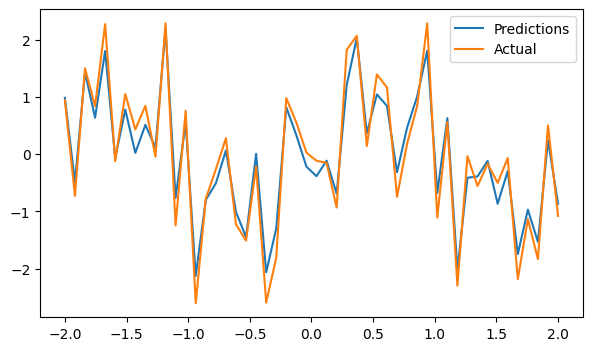

In [97]:
fig, ax = plt.subplots(figsize = (7,4))
ax.plot(time_step, preds, label = 'Predictions')
ax.plot(time_step, y, label = 'Actual')
ax.legend()

We can also provide ElasticNetCV() a defined list of values to try to alpha and l1_ratio_

In [111]:
# Alot of these parameters lead to non-convergence and sklearn is very pushy with warnings, so I am forcing their suppression here. 
# Never use this in real code as you are suppresing all warnings without any output
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

l1_ratios = [0.01, 0.05, 0.1, 0.5, 0.9]
alphas = [0.01, 0.05, 0.1, 0.5, 0.9]


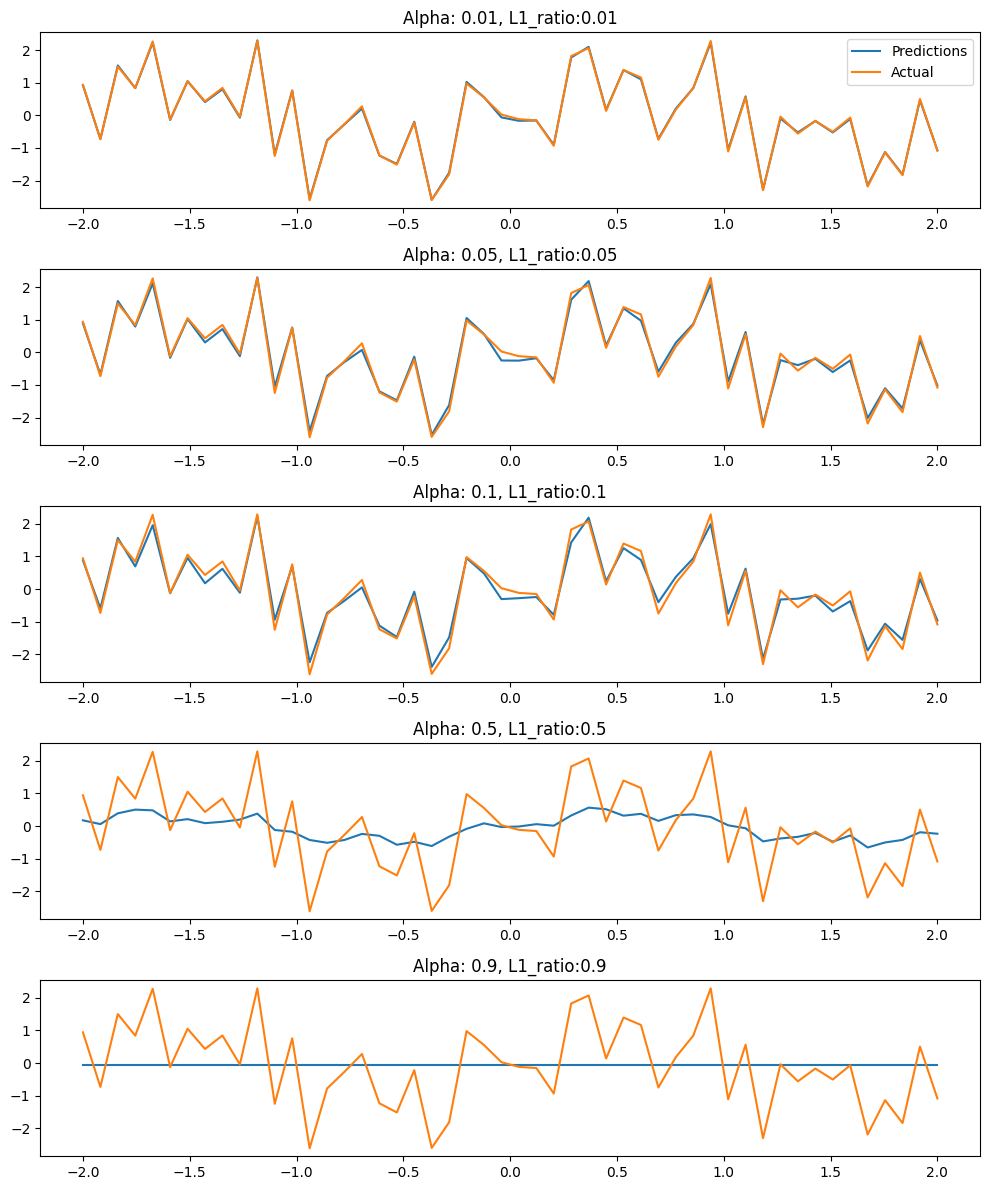

In [116]:

fig, axes = plt.subplots(nrows = len(alphas), ncols = 1, figsize = (10,12))
axs = np.ravel(axes)
for i, (l1_ratio, alpha) in enumerate(zip(l1_ratios, alphas)):
    EN =  ElasticNet(l1_ratio = l1_ratio, alpha = alpha) # Note the change from ElasticNetCV
    EN.fit(X,y)
    preds = EN.predict(X)
    axs[i].plot(time_step, preds, label = 'Predictions')
    axs[i].plot(time_step, y, label = 'Actual')
    axs[i].set_title(f"Alpha: {alpha}, L1_ratio:{l1_ratio}")

axs[0].legend()
plt.tight_layout()